# Fetch Take Home Assessment - Siddarth Puliyanda

### 1. Explore the Data

Here is an outline of the steps I am going to take with exploring the data:
- Read in all 3 table (products, transaction, users) and visually analyze the first 3 rows of each
- Check the size, datatype, and count of nulls of each dataframe
- Analyze individual columns from each dataframe to gather information about the blank cells, number of unique values, and more


Note:
- I will not be changing any values of the dataframes at this point, only exploring the data
- I will be adding my comments to the code, as well as written thoughts at the end of the section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


/Users/siddthekidd/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/siddthekidd/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
##Load all 3 dataframes
products = pd.read_csv('PRODUCTS_TAKEHOME.csv') #products dataframe
transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv') #transaction dataframe
users = pd.read_csv('USER_TAKEHOME.csv') #users dataframe

In [3]:
##Display the first 3 rows of each dataframe
display(products.head(3)) #products dataframe
display(transaction.head(3)) #transaction dataframe
display(users.head(3)) #users dataframe

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female


In [4]:
##Check size of dataframes
print("The size of the products dataframe is:", products.shape) #products shape
print("The size of the transaction dataframe is:", transaction.shape) #transaction shape
print("The size of the users dataframe is:", users.shape) #users shape

The size of the products dataframe is: (845552, 7)
The size of the transaction dataframe is: (50000, 8)
The size of the users dataframe is: (100000, 6)


In [5]:
##Check info of each df
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [8]:
#Check for missing values in the dataframes
display(products.isnull().sum()) #product null count
display(transaction.isnull().sum()) #transaction null count
display(users.isnull().sum()) #users null count

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

##### Products Table

In [9]:
##Display column headers for products dataframe
products.columns

Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')

In [49]:
##Analyze MANUFACTURER column in products dataframe
display(products['MANUFACTURER'].value_counts().head(10)) #Total count for each manufacturer
#21065 are PLACEHOLDER MANUFACTURER

print(products['MANUFACTURER'].nunique()) #Count of unique manufacturers
#4354 unique manufacturers

MANUFACTURER
PLACEHOLDER MANUFACTURER    86902
PROCTER & GAMBLE            21065
REM MANUFACTURER            20813
UNILEVER                    16864
L'OREAL                     16699
PEPSICO                     14468
JOHNSON & JOHNSON           10443
THE HERSHEY COMPANY         10222
MARS WRIGLEY                 9732
MONDELĒZ INTERNATIONAL       7250
Name: count, dtype: int64

4354


In [52]:
##Analyze BRAND column in products dataframe
display(products['BRAND'].value_counts().head(10)) #Total count for each brand
#17025 are BRAND NOT KNOWN

print(products['BRAND'].nunique()) #Count of unique brand
#8122 unique brands

BRAND
REM BRAND          20813
BRAND NOT KNOWN    17025
PRIVATE LABEL      13467
CVS                 6400
SEGO                4831
MEIJER              4050
DOVE                3857
RITE AID            3238
MATRIX              2958
EQUATE              2946
Name: count, dtype: int64

8122


In [12]:
##Display count of unique BARCODE
products['BARCODE'].nunique() #Count of unique barcodes
#Count of unique barcodes is the same as total number of rows with non-null barcodes (841342 barcodes)

841342

##### Transaction Table

In [13]:
##Display column headers for transactions dataframe
transaction.columns

Index(['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID',
       'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE'],
      dtype='object')

In [32]:
##Count of rows where PURCHASE_DATE and SCAN_DATE are not the same day
#Convert columns to datetime
transaction["PURCHASE_DATE"] = pd.to_datetime(transaction["PURCHASE_DATE"]).dt.date
transaction["SCAN_DATE"] = pd.to_datetime(transaction["SCAN_DATE"]).dt.date

#Count and print number rows where dates are different
count = (transaction["PURCHASE_DATE"] != transaction["SCAN_DATE"]).sum()
print(f"Number of rows with different dates: {count}")

Number of rows with different dates: 26178


In [14]:
##Analyze BARCODE column in transaction dataframe
print(transaction['BARCODE'].nunique()) #Count of unique barcodes
#11027 unique barcodes

11027


In [53]:
##Analyze FINAL_QUANTITY column in transaction dataframe
display(transaction['FINAL_QUANTITY'].value_counts().head(10)) #Counts for each quantity
#12500 have a final quantity of 0, and other cells have fractional quantities

FINAL_QUANTITY
1.00     35698
zero     12500
2.00      1285
3.00       184
4.00       139
6.00        26
5.00        22
8.00         8
12.00        7
7.00         7
Name: count, dtype: int64

In [54]:
##Analyze FINAL_SALE column in transaction dataframe
display(transaction['FINAL_SALE'].value_counts().head(10)) #Counts for each final sale
#12500 cells have no final sale value, and 480 have a final sale value of 0

FINAL_SALE
        12500
1.25     1323
1.00      744
2.99      588
1.99      586
3.99      567
2.00      537
3.98      508
4.99      484
0.00      480
Name: count, dtype: int64

##### Users Table

In [22]:
##Display column headers for users dataframe
users.columns

Index(['ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER'], dtype='object')

In [23]:
##Analyze ID column in users dataframe
print(users['ID'].nunique()) #Count of unique IDs
#All 100,000 IDs are unique

100000


STATE
TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
Name: count, dtype: int64

52


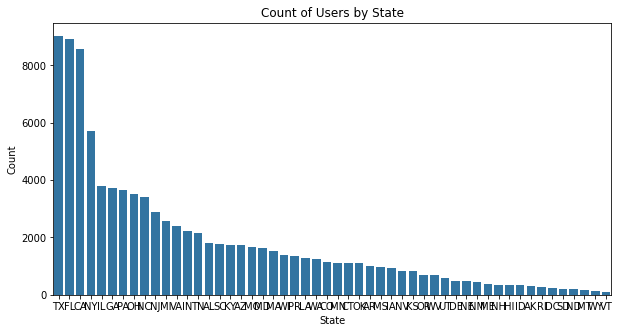

In [55]:
##Analyze STATE column in users dataframe
display(users['STATE'].value_counts().head(10)) #Total counts for each state

print(users['STATE'].nunique()) #Count of unique states
#52 unique states, including Washington, D.C. and Puerto Rico

#Barchart for State column in users dataframe
plt.figure(figsize=(10,5))
sns.countplot(x='STATE', data=users, order = users['STATE'].value_counts().index)
plt.title('Count of Users by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

GENDER
female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64

11


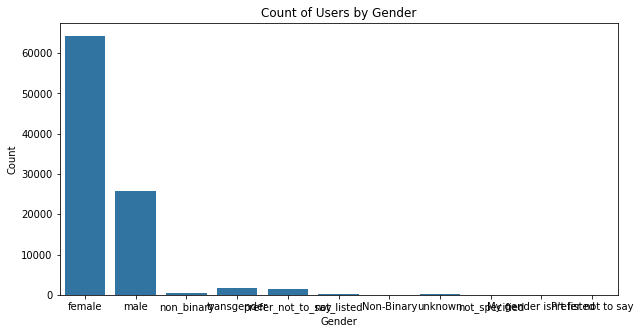

In [28]:
##Analyze GENDER column in users dataframe
display(users['GENDER'].value_counts()) #Total counts for each gender

print(users['GENDER'].nunique()) #Count of unique genders
#11 unique genders, 196 are "unknown" and 180 are "not_listed"

#Barchart for GENDER column in users dataframe
plt.figure(figsize=(10,5))
sns.countplot(x='GENDER', data=users)
plt.title('Count of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

LANGUAGE
en        63403
es-419     6089
Name: count, dtype: int64

2


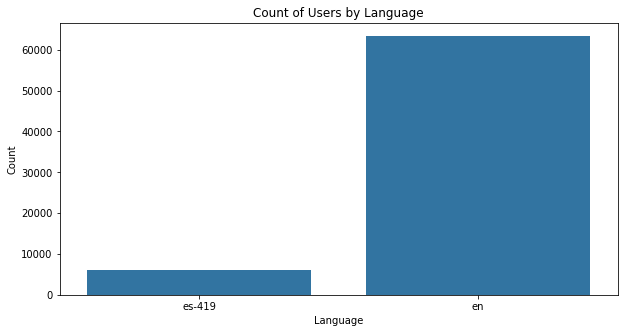

In [29]:
##Analyze LANGUAGE column in users dataframe
display(users['LANGUAGE'].value_counts()) #Total counts for each language

print(users['LANGUAGE'].nunique()) #Count of unique languages
#Only 2 languages: English and Spanish

#Barchart for LANGUAGE column in users dataframe
plt.figure(figsize=(10,5))
sns.countplot(x='LANGUAGE', data=users)
plt.title('Count of Users by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

Data quality issues:

1) Transactions table has duplicate rows. When a duplicative row appears, either the FINAL_QUANTITY column contains “zero” or the FINAL_SALE column is blank. I will remove these duplicates before running my analysis.

2) High amount of blanks and cells that are filled in as “unknown” that are present in certain columns of the 3 datasets. Below, I will detail the key columns with blanks as well as some additional useful information.

- Products Table (out of total 845,552 rows)
    - CATEGORY_1: 111 blanks, probably not too big of an issue since it is a very small portion of the total rows
    - CATEGORY_2/3/4: all of the remaining CATEGORY columns have an increasing number of blanks but these are probably ok staying blank as long as CATEGORY_1 is filled
    - MANUFACTURER: 226,474 blanks and an additional 86,902 are "Placeholder Manufacturer"
    - BRAND: 226,472 blanks (almost same blanks as MANUFACTURER besides 2 cells) and an additional 17,025 are "Brand Not Known"
    - BARCODE: 4,025 blanks, every row has a unique barcode

- Transactions Table (out of total 50,000 rows)
    - BARCODE: 5762 blanks and 8 cells with -1 as a value (which seems like a placeholder value); this is the key to match with the Products table so having less blanks here would lead to more a robust and accurate analysis
    - FINAL_QUANTITY: 12500 have a quantity of “zero” and a few other cells have fractional quantities, I would want to explore why zeroes and fractions exist (sometimes it is ok to have fractional quantities depending on the type of item being sold, but it could also be a data cleaning issue)
    - FINAL_SALE: when a duplicate row occurs, the first row will have a blank FINAL_SALE value while the remaining rows with the same info

- Users Table (out of total 100,000 rows)
    - BIRTH_DATE: 3675 blanks
    - STATE: 4812 blanks
    - LANGUAGE: 30508 blanks
    - GENDER: 5892 blanks, 180 are "NOT_LISTED" and 28 are "NOT_SPECIFIED"

Fields that are challenging to understand:

- In the Transactions Table, I am not sure what the distinction is between PURCHASE_DATE and SCAN_DATE is. In 26,178 rows the scan date is a different day than the purchase date, but in the remaining columns the purchase date and scan date are the same. What exactly is the difference between purchasing and scanning?
- Again the the Transactions Table, the relationship between FINAL_QUANTITY and FINAL_SALE columns in the transactions dataset is challenging to understand. When the quantity is a number greater than 1, does that mean each item in the barcode costs that much or does it mean the total quantity costs that much?
- Finally the last challenge is how to deal with the duplicate rows in the Transactions Table. I will be removing cells where FINAL_QUANTITY and FINAL_SALE are nulls or not numeric and using this edited table for the next part of my analysis. If there is a better way to clean up these duplicates I would be open hearing about it.

In [33]:
##Remove duplicate rows from transaction dataframe
#Remove cells where FINAL SALE is not a number
transaction_edit = transaction[transaction['FINAL_SALE'].apply(lambda x: str(x).replace('.','',1).isdigit())]
#Remove cells where FINAL QUANTITY is not a number
transaction_edit = transaction_edit[transaction_edit['FINAL_QUANTITY'].apply(lambda x: str(x).replace('.','',1).isdigit())]
transaction_edit.shape
#25,000 rows in the new dataframe with duplicates removed

(25000, 8)

# 2. SQL Queries

For the SQL analysis, I will use SQLite3 as my SQL library/language since it is easiest for me to use within a Python notebook file. SQLite3 queries are slightly different than MySQL or PostgreSQL queries but are easy to convert to the different types of SQL languages. Here are the steps I will take:
- Load the 3 tables into a SQLite3 database named "fetch.db"
- Write a query for each of the 3 selected questions from the assessment instructions
- The answer to each question will be in a markdown cell directly below the query cell, and all questions/answers will be restated after the last question

In [39]:
import sqlite3

##Load dfs to SQL database
#Connect to the SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('fetch.db')

#Write the dfs to the SQLite database
products.to_sql('products_table', conn, if_exists='replace', index=False)
transaction_edit.to_sql('transaction_table', conn, if_exists='replace', index=False)
users.to_sql('users_table', conn, if_exists='replace', index=False)

#Commit and close connection to ensure tables are saved in database
conn.commit()
conn.close()

In [ ]:
##Query 1
#Reconnect to the SQLite database
conn = sqlite3.connect('fetch.db')
cursor = conn.cursor()

#What are the top 5 brands by sales among users that have had their account for at least six months?
query1 = '''SELECT p.BRAND, SUM(t.FINAL_SALE) AS TOTAL_SALES
            FROM transaction_table t
            LEFT JOIN products_table p
            ON p.BARCODE = t.BARCODE
            LEFT JOIN users_table u
            ON t.USER_ID = u.ID
            WHERE DATE('now', '-6 months') >= DATE(u.CREATED_DATE)
            AND p.BRAND IS NOT NULL
            GROUP BY p.BRAND
            ORDER BY TOTAL_SALES DESC
            LIMIT 5;'''

cursor.execute(query1)
results1 = cursor.fetchall()

#Display query results
for result1 in results1:
    print(result1)


('CVS', 72.0)
('DOVE', 30.910000000000004)
('TRIDENT', 23.36)
('COORS LIGHT', 17.48)
('TRESEMMÉ', 14.58)


Question 1:
- What are the top 5 brands by sales among users that have had their account for at least six months?

Answer:
- CVS, Dove, Trident, Coors Light, and Tresemme


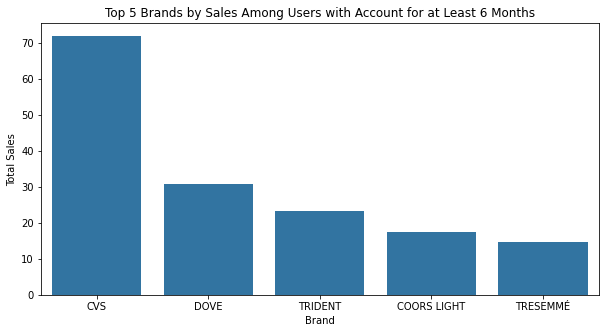

In [48]:
#Barchart for query 1 results
brands = [result1[0] for result1 in results1]
sales = [result1[1] for result1 in results1]

plt.figure(figsize=(10,5))
sns.barplot(x=brands, y=sales)
plt.title('Top 5 Brands by Sales Among Users with Account for at Least 6 Months')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
##Query 2
#Which is the leading brand in the Dips & Salsa category?
query2 = '''SELECT p.BRAND, SUM(t.FINAL_QUANTITY) as Quantity
            FROM transaction_table t
            LEFT JOIN products_table p
            ON p.BARCODE = t.BARCODE
            WHERE p.CATEGORY_2 = 'Dips & Salsa'
            AND p.BRAND IS NOT NULL
            GROUP BY p.BRAND
            ORDER BY Quantity DESC
            LIMIT 1;'''

cursor.execute(query2)
results2 = cursor.fetchall()

#Display query results
for result2 in results2:
    print(result2)


('TOSTITOS', 38.0)


Question 2:
- Which is the leading brand in the Dips & Salsa category?

Answer:
- Tostitos


In [ ]:
##Query 3
#Who are Fetch's power users?
#Power users will be defined as the top 5 users by total spend
query3 = '''SELECT u.ID, SUM(t.FINAL_SALE) AS SPEND
            FROM transaction_table t
            LEFT JOIN users_table u
            ON t.USER_ID = u.ID
            WHERE U.ID IS NOT NULL
            GROUP BY u.ID
            ORDER BY SPEND DESC
            LIMIT 5;'''

cursor.execute(query3)
results3 = cursor.fetchall()

#Display query results
for result3 in results3:
    print(result3)


('643059f0838dd2651fb27f50', 75.99)
('62ffec490d9dbaff18c0a999', 26.14)
('5f4c9055e81e6f162e3f6fa8', 18.98)
('5d191765c8b1ba28e74e8463', 17.48)
('61a58ac49c135b462ccddd1c', 14.989999999999998)


Question 3:
- Who are Fetch's power users?

Answer:
- I will define power users as the top 5 users by total spend. Here is a list of the user_ids and their corresponding total spend:
1. 643059f0838dd2651fb27f50: $75.99
2. 62ffec490d9dbaff18c0a999: $26.14
3. 5f4c9055e81e6f162e3f6fa8: $18.98
4. 5d191765c8b1ba28e74e8463: $17.48
5. 61a58ac49c135b462ccddd1c: $14.99



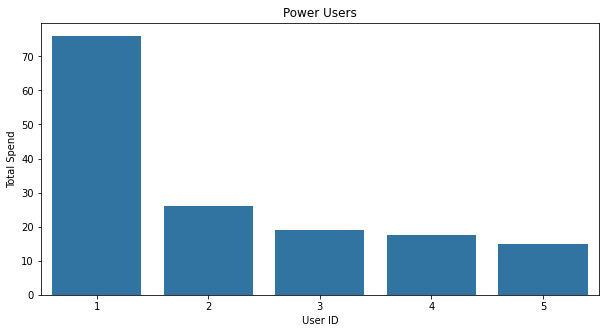

In [ ]:
#Barchart of result in Query 3
#Create a dataframe from the results
df_query3 = pd.DataFrame(results3, columns=['ID', 'SPEND'])
#Add an index column named 'Rank'
df_query3['Rank'] = df_query3.index + 1

#Barchart for top 10 users by spend
plt.figure(figsize=(10,5))
sns.barplot(x='Rank', y='SPEND', data=df_query3)
plt.title('Power Users')
plt.xlabel('User ID')
plt.ylabel('Total Spend')
plt.show()

# Communicate to Stakeholders

Hi Mr. Fetch,

I’ve completed my initial data analysis for the 3 datasets, which are the products, transaction, and users tables. I wanted to share some of the results of my investigation, as well as ask a few questions that would help me further my analysis.

Here are the 4 data quality issues I discovered:
1. The transaction table seems to have duplicate rows. These duplicates typically occur when the FINAL_QUANTITY column is zero or the FINAL_SALE value is blank. To ensure accurate analysis, I plan to remove these duplicates, but I’d like to confirm whether this aligns with expected business logic.
2. There are a significant number of missing or "unknown" values across multiple columns in all 3 datasets, some more significant than others. Understanding whether these values can be inferred, ignored, or if we have a way to supplement them would help improve the reliability of our insights.
3. There is a discrepancy between PURCHASE_DATE and SCAN_DATE in the transactions table. In 26,178 rows, these dates do not match, while in the remaining rows, they are the same. This raises questions about how transactions are recorded—whether scanning happens after the actual purchase, if delays exist in processing, or if some transactions are logged incorrectly. Understanding the reason for these differences could provide insights into customer behavior or potential data entry issues.
4. I noticed that some user demographic data, like birth date, state, language, and gender, is incomplete. Do we have a way to enrich these records, or should we assume they gaps in user profiles that cannot be filled in?

One interesting trend in the data I found is the significant gender imbalance among users. There are 64,240 female users compared to 25,829 male users, indicating that the our customer base has 2.48 times more female than male users. Understanding why there is such a disparity—whether it's due to targeted marketing, product preferences, or other demographic factors—could help refine user engagement strategies and drive more balanced growth in the future.

To move forward, I’d appreciate some guidance on how to handle the duplicate transactions and if we already have existing processes to address missing or "unknown" values. Also, speaking with someone who is familiar with the data collection steps would be help ensure we’re interpreting the data correctly. Let me know if we can set up a time to discuss these questions, or an email back would also be fine.

Looking forward to your thoughts!

Thanks,

Sid Puliyanda

